<h1 style="color: #9B243A;">Board Games ML Clustering</h1>

<h3 style="color: #b35a;">-- Importing important libraries --</h3>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1 style="color: #e8891d;">Data Extraction</h1>

In [9]:
game_data = pd.read_csv("games.csv")
subcategories = pd.read_csv("subcategories.csv")
mechanics = pd.read_csv("mechanics.csv")
themes = pd.read_csv("themes.csv")

In [10]:
merged_df = pd.merge(game_data, subcategories, on='BGGId', how='inner')
merged_df = pd.merge(merged_df, mechanics, on='BGGId', how='inner')
merged_df = pd.merge(merged_df, themes, on='BGGId', how='inner')

<h3 style="color: #b35a;">-- Exploring the data (first impressions) --</h3>

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
merged_df.head()

BGGId            Name                                        Description  \
0      1      Die Macher  die macher game seven sequential political rac...   
1      2    Dragonmaster  dragonmaster tricktaking card game base old ga...   
2      3         Samurai  samurai set medieval japan player compete gain...   
3      4  Tal der Könige  triangular box luxurious large block tal der k...   
4      5         Acquire  acquire player strategically invest business t...   

   YearPublished  GameWeight  AvgRating  BayesAvgRating   StdDev  MinPlayers  \
0           1986      4.3206    7.61428         7.10363  1.57979           3   
1           1981      1.9630    6.64537         5.78447  1.45440           3   
2           1998      2.4859    7.45601         7.23994  1.18227           2   
3           1992      2.6667    6.60006         5.67954  1.23129           2   
4           1964      2.5031    7.33861         7.14189  1.33583           2   

   MaxPlayers  ComAgeRec  LanguageEase  BestPlayers      GoodPlayers  \
0           5  14.366667      1.395833            5       ['4', '5']   
1           4        NaN     27.000000            0               []   
2           4   9.307692      1.000000            3  ['2', '3', '4']   
3           4  13.000000    256.000000            0               []   
4           6  11.410256     21.152941            4  ['3', '4', '5']   

   NumOwned  NumWant  NumWish  NumWeightVotes  MfgPlaytime  ComMinPlaytime  \
0      7498      501     2039             761          240             240   
1      1285       72      191              54           30              30   
2     15578      799     3450            1451           60              30   
3       638       54      123              30           60              60   
4     23735      548     2671            1606           90              90   

   ComMaxPlaytime  MfgAgeRec  NumUserRatings  NumComments  NumAlternates  \
0             240         14            5354            0              2   
1              30         12             562            0              0   
2              60         10           15146            0              6   
3              60         12             340            0              0   
4              90         12           18655            0              6   

   NumExpansions  NumImplementations  IsReimplementation  \
0              0                   0                   0   
1              0                   2                   1   
2              0                   1                   0   
3              0                   0                   0   
4              2                   0                   0   

                          Family  Kickstarted  \
0    Classic Line (Valley Games)            0   
1                            NaN            0   
2  Euro Classics (Reiner Knizia)            0   
3                            NaN            0   
4                   3M Bookshelf            0   

                                           ImagePath  Rank:boardgame  \
0  https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...             316   
1  https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...            3993   
2  https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...             224   
3  https://cf.geekdo-images.com/nYiYhUlatT2DpyXaJ...            5345   
4  https://cf.geekdo-images.com/3C--kJRhi6kTPHsr9...             290   

   Rank:strategygames  Rank:abstracts  Rank:familygames  Rank:thematic  \
0                 180           21926             21926          21926   
1                1577           21926             21926          21926   
2                 166           21926             21926          21926   
3               21926           21926             21926          21926   
4                 220           21926             21926          21926   

   Rank:cgs  Rank:wargames  Rank:partygames  Rank:childrensgames  \
0     21926          21926            21926                21926   
1     21926       

In [14]:
merged_df.shape

(21925, 432)

<h3 style="color: #b35a;">-- Column Standardization --</h3>

In [16]:
merged_df.columns = [column.lower().replace(' ', '_') for column in merged_df.columns]

<h3 style="color: #b35a;">-- Copy as best practice --</h3>

In [18]:
df = merged_df.copy()

<h1 style="color: #e8891d;">Data Cleaning</h1>

<h3 style="color: #b35a;">-- Feature Selection --</h3>

Here we want to keep only features that relate to game characteristics, in order to build a recommender system that would identify similar games.

In [21]:
cols_to_drop = ["name", "description", "goodplayers", "family", "imagepath", "comagerec", "numcomments", "languageease", "bayesavgrating", "stddev", "numwish", "numwant", "numowned", "numuserratings", "numweightvotes", "numalternates", "numimplementations", "isreimplementation", 'rank:boardgame', 'rank:strategygames', 'rank:abstracts', 'rank:familygames', 'rank:thematic', 'rank:cgs', 'rank:wargames','rank:partygames','rank:childrensgames', "bestplayers", "comminplaytime", "commaxplaytime"]

In [22]:
df.drop(columns=cols_to_drop, inplace=True)

<h3 style="color: #b35a;">-- Checking Empty Spaces --</h3>

In [24]:
empty_spaces_mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == "")

# Check if there are any empty spaces
if empty_spaces_mask.any().any():
    print("There are empty spaces in the DataFrame.")
else:
    print("No empty spaces found.")

No empty spaces found.


<h3 style="color: #b35a;">-- Checking Null Values --</h3>

In [26]:
df.isnull().sum().unique()

array([0], dtype=int64)

<h3 style="color: #b35a;">-- Checking Duplicates --</h3>

In [28]:
df.duplicated().sum()

0

<h3 style="color: #b35a;">-- Checking for constant columns --</h3>

In [30]:
constant_columns = df.columns[df.nunique() <= 1]
print(f"Constant columns: {constant_columns}")

Constant columns: Index([], dtype='object')


<h3 style="color: #b35a;">-- Moving the target to the right --</h3>

In [32]:
target = df.pop('avgrating')
df['avgrating'] = target

<h1 style="color: #e8891d;"> EDA (Exploratory Data Analysis)</h1>

<h3 style="color: #b35a;">-- Selecting numerical columns --</h3>

In [35]:
numerical_features = ["yearpublished", "gameweight", "minplayers", "maxplayers", "mfgplaytime", "mfgagerec", "numexpansions", "avgrating"]

In [36]:
numerical_df = df[numerical_features]

<h3 style="color: #b35a;">-- Statistical Information about numerical columns --</h3>

In [38]:
numerical_df.describe()

yearpublished    gameweight    minplayers    maxplayers   mfgplaytime  \
count   21925.000000  21925.000000  21925.000000  21925.000000  21925.000000   
mean     1985.494914      1.982131      2.007343      5.707868     90.513523   
std       212.486214      0.848983      0.693093     15.014643    529.657389   
min     -3500.000000      0.000000      0.000000      0.000000      0.000000   
25%      2001.000000      1.333300      2.000000      4.000000     25.000000   
50%      2011.000000      1.968800      2.000000      4.000000     45.000000   
75%      2017.000000      2.525200      2.000000      6.000000     90.000000   
max      2021.000000      5.000000     10.000000    999.000000  60000.000000   

          mfgagerec  numexpansions     avgrating  
count  21925.000000   21925.000000  21925.000000  
mean       9.613409       1.380068      6.424922  
std        3.641560       7.701036      0.932477  
min        0.000000       0.000000      1.041330  
25%        8.000000       0.000000      5.836960  
50%       10.000000       0.000000      6.453950  
75%       12.000000       1.000000      7.052450  
max       25.000000     525.000000      9.914290

<h3 style="color: #b35a;">-- More cleaning (dealing with negative minimum and maximum values that should be nulls) --</h3>

In [40]:
df[df.maxplayers == 0].value_counts().count()

173

In [41]:
df = df[df.maxplayers != 0]

In [42]:
df[df.minplayers == 0].value_counts().count()

9

In [43]:
df = df[df.minplayers != 0]

In [44]:
df[df.mfgagerec == 0].value_counts().count()

1272

In [45]:
df = df[df.mfgagerec != 0]

In [46]:
df[df.gameweight == 0].value_counts().count()

469

In [47]:
df = df[df.gameweight != 0]

In [48]:
df[df.mfgplaytime == 0].value_counts().count()

498

In [49]:
df = df[df.mfgplaytime != 0]

In [50]:
constant_columns = df.columns[df.nunique() <= 1]
print(f"Constant columns: {constant_columns}")

Constant columns: Index(['theme_french_foreign_legion'], dtype='object')


In [51]:
df = df.drop(columns=constant_columns)

In [52]:
numerical_df = df[numerical_features]

In [53]:
numerical_df.describe()

yearpublished    gameweight    minplayers    maxplayers   mfgplaytime  \
count   19504.000000  19504.000000  19504.000000  19504.000000  19504.000000   
mean     1991.159967      2.017103      2.012459      5.722570     88.804707   
std       181.301149      0.791153      0.683752     15.330397    533.653070   
min     -3500.000000      1.000000      1.000000      1.000000      1.000000   
25%      2001.000000      1.333300      2.000000      4.000000     30.000000   
50%      2011.000000      2.000000      2.000000      4.000000     45.000000   
75%      2017.000000      2.511450      2.000000      6.000000     90.000000   
max      2021.000000      5.000000     10.000000    999.000000  60000.000000   

          mfgagerec  numexpansions     avgrating  
count  19504.000000   19504.000000  19504.000000  
mean      10.262356       1.440422      6.427820  
std        2.762196       7.805935      0.912948  
min        1.000000       0.000000      1.041330  
25%        8.000000       0.000000      5.853795  
50%       10.000000       0.000000      6.455800  
75%       12.000000       1.000000      7.039600  
max       25.000000     525.000000      9.914290

<h3 style="color: #b35a;">-- Checking distributions --</h3>

In [249]:
numerical_features2 =['minplayers', 'maxplayers', 'gameweight',  'mfgplaytime', 'numexpansions', 'mfgagerec']

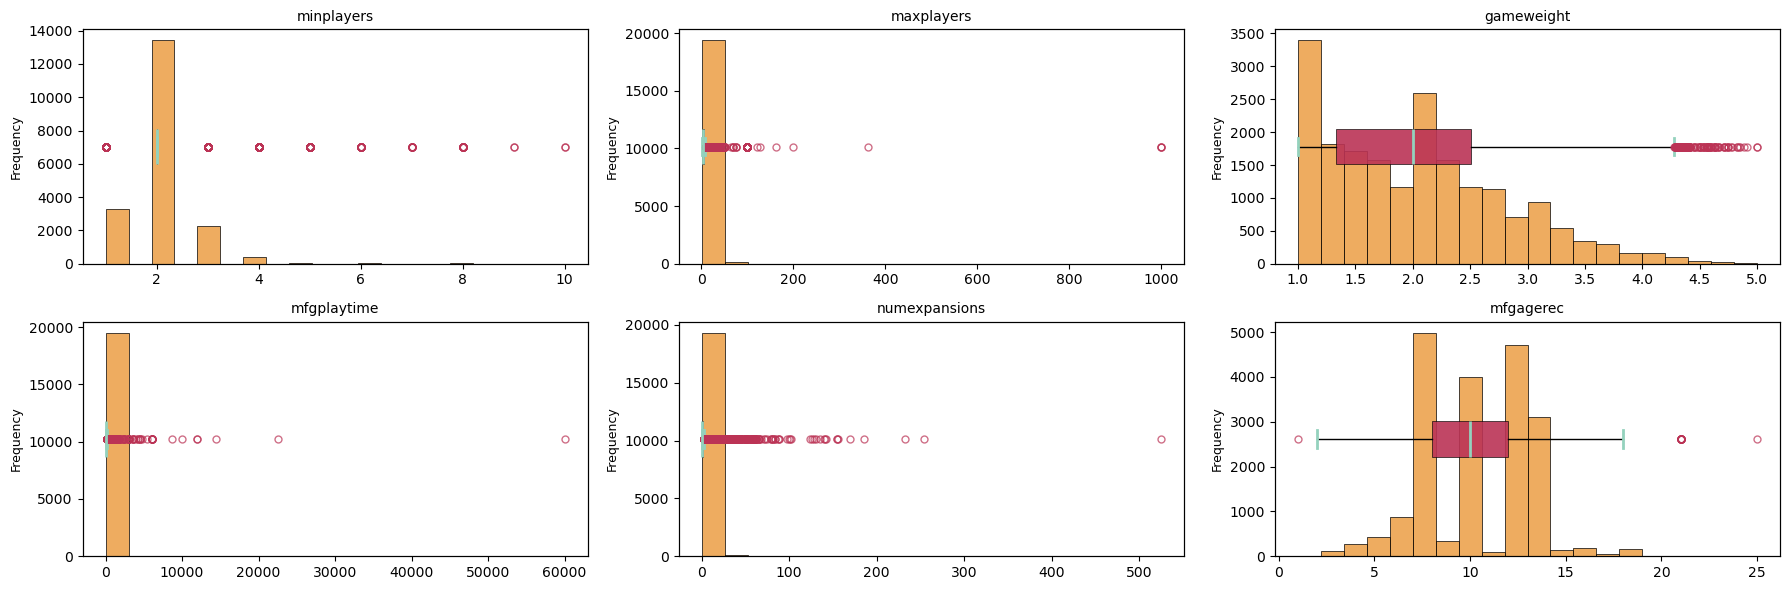

In [251]:
import math
ncols = 3
nrows = math.ceil(len(numerical_features2) / ncols)  # Calculate the number of rows
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each numerical column
for i, col in enumerate(numerical_features2):
    # Plot histogram
    sns.histplot(
        numerical_df[col], kde=False, bins=20, color="#e8891d", ax=axes[i], alpha=0.7, linewidth=0.5
    )
    axes[i].set_xlabel("")
    
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        numerical_df[col].dropna(),  # Ensure no NaNs in boxplot
        vert=False,  # Horizontal boxplot
        patch_artist=True,
        boxprops=dict(facecolor='#b35a', color='black', alpha=0.9, linewidth=0.5),
        medianprops=dict(color='#94D2BD', linewidth=2),
        whiskerprops=dict(color='black'),
        capprops=dict(color='#94D2BD', linewidth=2),
        flierprops=dict(
            marker='o', color='#b35a', markeredgecolor="#b35a", alpha=0.7, markersize=5
        ),
    )

    # Remove twin y-axis ticks and labels
    box_ax.set_yticks([])
    box_ax.get_yaxis().set_visible(False)

    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(numerical_features2), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<h3 style="color: #b35a;">-- Selecting categorical columns --</h3>

In [57]:
categorical_df = df.drop(columns=numerical_features, errors='ignore')

In [58]:
corr_matrix = categorical_df.corr().round(3)

In [61]:
perfect_corr = (corr_matrix == 1) | (corr_matrix == -1)
perfect_corr_counts = perfect_corr.sum(axis=0)
features_with_multiple_ones = perfect_corr_counts[perfect_corr_counts > 1].index
filtered_corr = corr_matrix.loc[features_with_multiple_ones, features_with_multiple_ones]
print(filtered_corr)

Empty DataFrame
Columns: []
Index: []


In [68]:
perfect_corr_counts.nunique()

1

<h1 style="color: #e8891d;">Data Processing</h1>

<h3 style="color: #b35a;">-- Normalizing the data --</h3>

In [73]:
numerical_df.head()

yearpublished  gameweight  minplayers  maxplayers  mfgplaytime  mfgagerec  \
0           1986      4.3206           3           5          240         14   
1           1981      1.9630           3           4           30         12   
2           1998      2.4859           2           4           60         10   
3           1992      2.6667           2           4           60         12   
4           1964      2.5031           2           6           90         12   

   numexpansions  avgrating  
0              0    7.61428  
1              0    6.64537  
2              0    7.45601  
3              0    6.60006  
4              2    7.33861

In [75]:
log_transform_vars = ['minplayers', 'maxplayers', 'gameweight', 'mfgplaytime', 'numexpansions', 'mfgagerec']

df_log = df.copy()

for col in log_transform_vars:
    if col in df_log.columns:
        df_log[col] = np.log1p(df_log[col])

In [76]:
numerical_df = df[log_transform_vars]

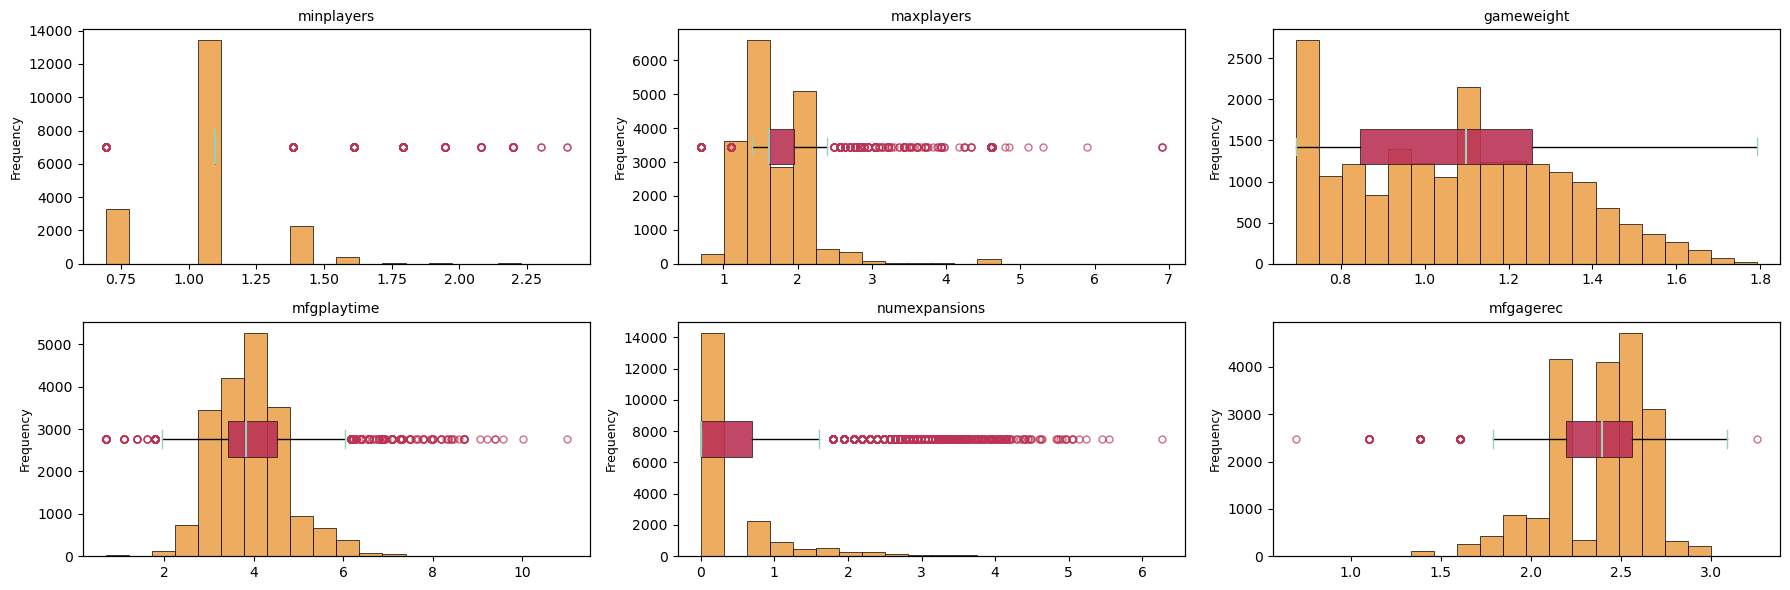

In [77]:
# Define grid layout
ncols = 3
nrows = -(-len(log_transform_vars) // ncols)  # Calculate rows (ceil division)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration


# Plot each numerical column
for i, col in enumerate(log_transform_vars):
    # Plot histogram
    sns.histplot(df_log[col], kde=False, bins=20, color="#e8891d", ax=axes[i], alpha=0.7, linewidth=0.5)
    axes[i].set_xlabel("")
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        df_log[col],
        vert=False,  # Horizontal boxplot
        patch_artist=True, 
        boxprops=dict(facecolor='#b35a', color='black', alpha=0.9, linewidth=0.5),  # Neon green box
        medianprops=dict(color='#94D2BD', linewidth=1.5),  # Yellow median line
        whiskerprops=dict(color='black'), 
        capprops=dict(color='#94D2BD', linewidth=1), 
        flierprops=dict(
            marker='o',  # Marker style for outliers
            color='#b35a',  # Fill color of outliers
            markeredgecolor="#b35a",  # Border color of outliers
            alpha=0.7,
            markersize=5  # Size of outliers
        )
    )
    
   # Adjust boxplot to center vertically on histogram
    y_hist_max = axes[i].get_ylim()[1]  # Get the maximum y-axis value of the histogram
    boxplot_center = y_hist_max / 2

    # Remove the twin y-axis ticks and labels
    box_ax.set_yticks([])  # Hide the right-side y-axis ticks
    box_ax.get_yaxis().set_visible(False)  # Completely hide the y-axis
    
    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(log_transform_vars), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [78]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the scaler only to the selected columns
df_log[log_transform_vars] = scaler.fit_transform(df_log[log_transform_vars])

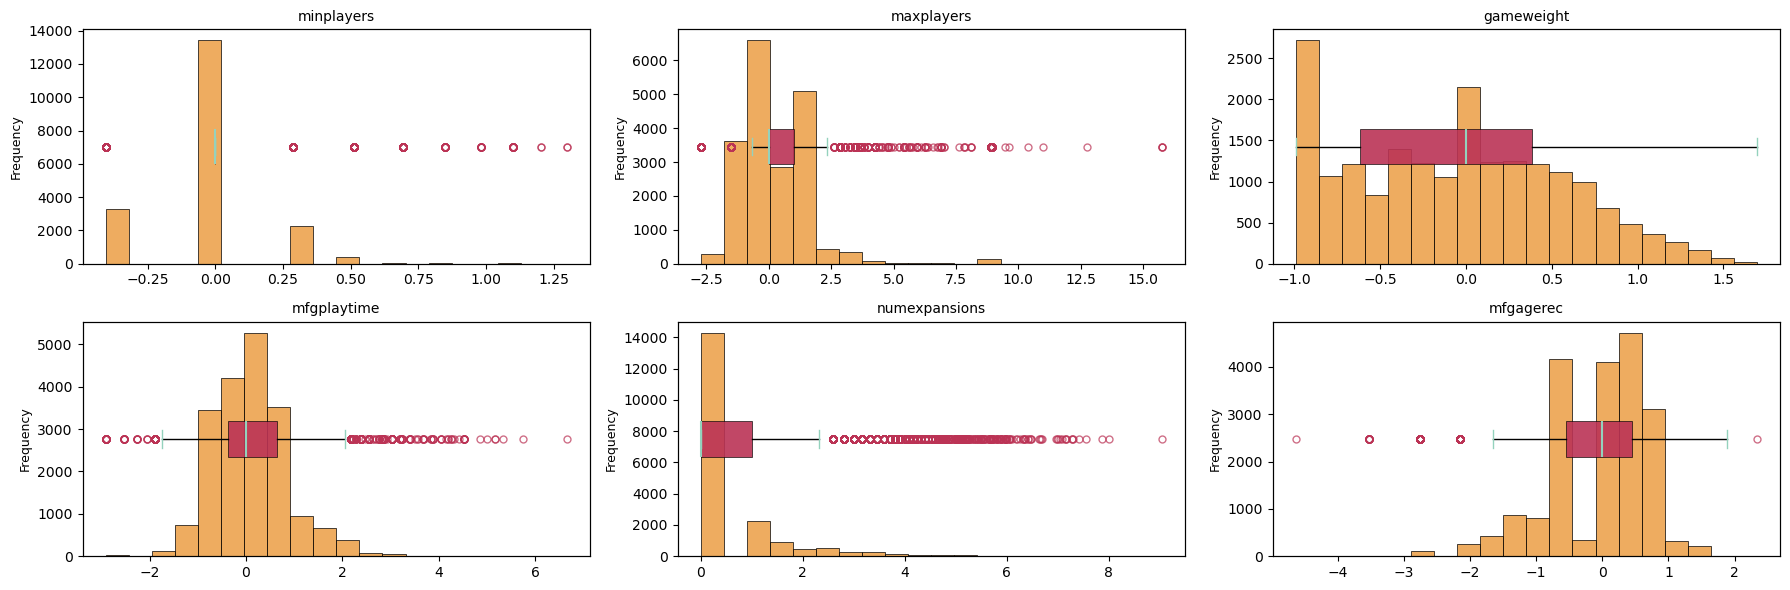

In [79]:
# Define grid layout
ncols = 3
nrows = -(-len(log_transform_vars) // ncols)  # Calculate rows (ceil division)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration


# Plot each numerical column
for i, col in enumerate(log_transform_vars):
    # Plot histogram
    sns.histplot(df_log[col], kde=False, bins=20, color="#e8891d", ax=axes[i], alpha=0.7, linewidth=0.5)
    axes[i].set_xlabel("")
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        df_log[col],
        vert=False,  # Horizontal boxplot
        patch_artist=True, 
        boxprops=dict(facecolor='#b35a', color='black', alpha=0.9, linewidth=0.5),  # Neon green box
        medianprops=dict(color='#94D2BD', linewidth=1.5),  # Yellow median line
        whiskerprops=dict(color='black'), 
        capprops=dict(color='#94D2BD', linewidth=1), 
        flierprops=dict(
            marker='o',  # Marker style for outliers
            color='#b35a',  # Fill color of outliers
            markeredgecolor="#b35a",  # Border color of outliers
            alpha=0.7,
            markersize=5  # Size of outliers
        )
    )
    
   # Adjust boxplot to center vertically on histogram
    y_hist_max = axes[i].get_ylim()[1]  # Get the maximum y-axis value of the histogram
    boxplot_center = y_hist_max / 2

    # Remove the twin y-axis ticks and labels
    box_ax.set_yticks([])  # Hide the right-side y-axis ticks
    box_ax.get_yaxis().set_visible(False)  # Completely hide the y-axis
    
    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(log_transform_vars), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler only to the selected columns
df_log[log_transform_vars] = minmax_scaler.fit_transform(df_log[log_transform_vars])

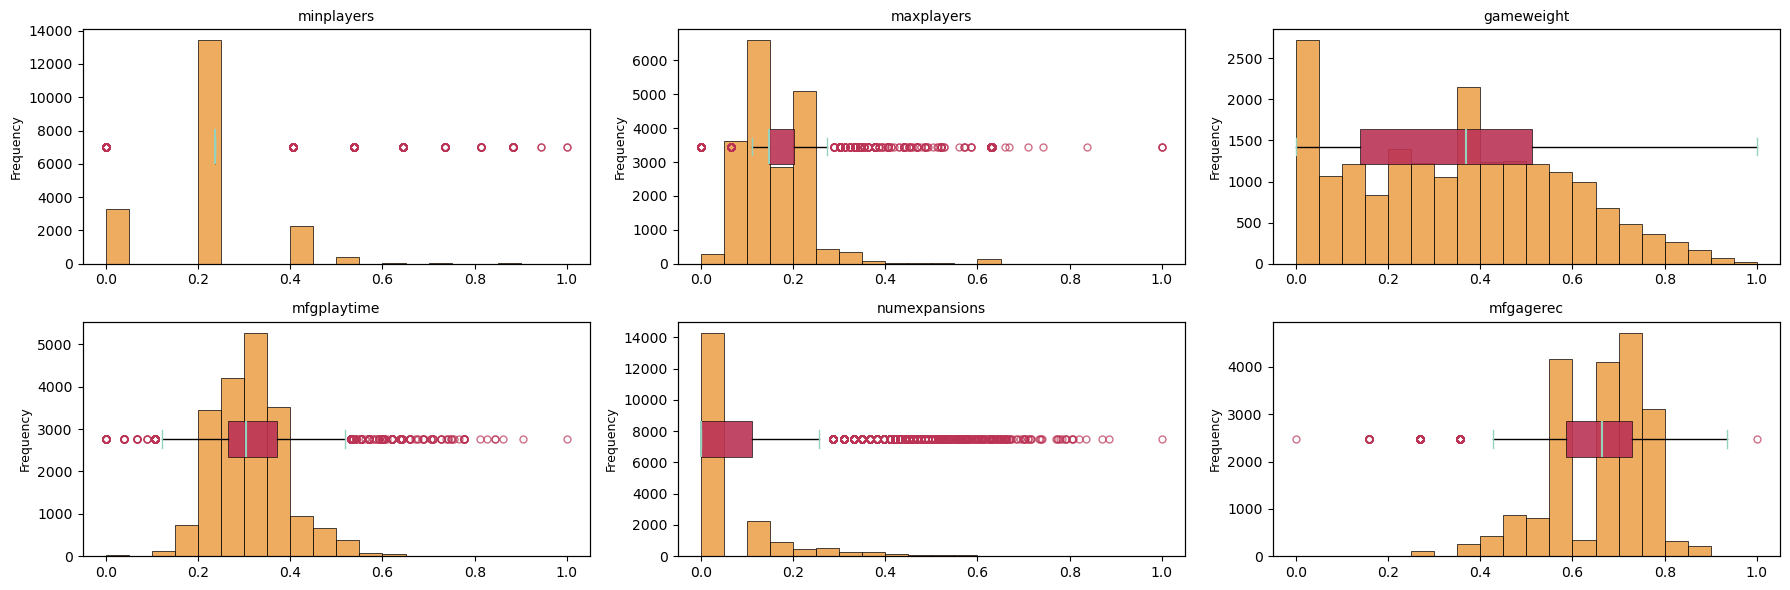

In [81]:
# Define grid layout
ncols = 3
nrows = -(-len(log_transform_vars) // ncols)  # Calculate rows (ceil division)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration


# Plot each numerical column
for i, col in enumerate(log_transform_vars):
    # Plot histogram
    sns.histplot(df_log[col], kde=False, bins=20, color="#e8891d", ax=axes[i], alpha=0.7, linewidth=0.5)
    axes[i].set_xlabel("")
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        df_log[col],
        vert=False,  # Horizontal boxplot
        patch_artist=True, 
        boxprops=dict(facecolor='#b35a', color='black', alpha=0.9, linewidth=0.5),  # Neon green box
        medianprops=dict(color='#94D2BD', linewidth=1.5),  # Yellow median line
        whiskerprops=dict(color='black'), 
        capprops=dict(color='#94D2BD', linewidth=1), 
        flierprops=dict(
            marker='o',  # Marker style for outliers
            color='#b35a',  # Fill color of outliers
            markeredgecolor="#b35a",  # Border color of outliers
            alpha=0.7,
            markersize=5  # Size of outliers
        )
    )
    
   # Adjust boxplot to center vertically on histogram
    y_hist_max = axes[i].get_ylim()[1]  # Get the maximum y-axis value of the histogram
    boxplot_center = y_hist_max / 2

    # Remove the twin y-axis ticks and labels
    box_ax.set_yticks([])  # Hide the right-side y-axis ticks
    box_ax.get_yaxis().set_visible(False)  # Completely hide the y-axis
    
    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(log_transform_vars), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [82]:
df_log.describe()

bggid  yearpublished    gameweight    minplayers    maxplayers  \
count   19504.000000   19504.000000  19504.000000  19504.000000  19504.000000   
mean   117092.919350    1991.159967      0.344190      0.226447      0.162221   
std    104738.588101     181.301149      0.232443      0.126599      0.076909   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     10916.750000    2001.000000      0.140301      0.237845      0.147441   
50%    106988.500000    2011.000000      0.369070      0.237845      0.147441   
75%    205496.500000    2017.000000      0.512357      0.237845      0.201584   
max    349161.000000    2021.000000      1.000000      1.000000      1.000000   

        mfgplaytime     mfgagerec  numexpansions   kickstarted  cat:thematic  \
count  19504.000000  19504.000000   19504.000000  19504.000000  19504.000000   
mean       0.312136      0.660793       0.056688      0.162377      0.060654   
std        0.086349      0.104488       0.115216      0.368806      0.238701   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.265869      0.586397       0.000000      0.000000      0.000000   
50%        0.304152      0.664632       0.000000      0.000000      0.000000   
75%        0.370329      0.729762       0.110633      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       cat:strategy       cat:war    cat:family       cat:cgs  cat:abstract  \
count  19504.000000  19504.000000  19504.000000  19504.000000  19504.000000   
mean       0.117155      0.146995      0.117155      0.014048      0.050554   
std        0.321614      0.354110      0.321614      0.117693      0.219090   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          cat:party  cat:childrens   exploration    miniatures  \
count  19504.000000   19504.000000  19504.000000  19504.000000   
mean       0.032147       0.043017      0.043273      0.047477   
std        0.176396       0.202900      0.203477      0.212663   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000   
75%        0.000000       0.000000      0.000000      0.000000   
max        1.000000       1.000000      1.000000      1.000000   

       territory_building     card_game   educational        puzzle  \
count        19504.000000  19504.000000  19504.000000  19504.000000   
mean             0.025174      0.301118      0.023431      0.031583   
std              0.156658      0.458756      0.151272      0.174892   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      1.000000      0.000000      0.000000   
max              1.000000      1.000000      1.000000      1.000000   

       collectible_components     word_game  print_&_play    electronic  \
count            19504.000000  19504.000000  19504.000000  19504.000000   
mean                 0.015176      0.021637      0.026148      0.009075   
std                  0.122257      0.145498      0.159581      0.094832   
min                  0.000000      0.000000      0.000000      0.000000   
25%                  0.000000      0.000000      0.000000      0.000000   
50%                  0.000000      0.000000      0.000000      0.000000   
75%                  0.000000      0.000000      0.000000      0.000000   
max              

<h1 style="color: #e8891d;">Data Modeling</h1>

<h3 style="color: #b35a;">-- Selecting features for unsupervised learning --</h3>

In [85]:
features_to_exclude = ["bggid", "yearpublished", "numexpansions", "kickstarted", "avgrating"]

In [86]:
features_df = df_log.drop(columns=features_to_exclude)

In [87]:
features_df.head()

gameweight  minplayers  maxplayers  mfgplaytime  mfgagerec  cat:thematic  \
0    0.890613    0.406598    0.176779     0.464804   0.785553             0   
1    0.357774    0.406598    0.147441     0.265869   0.729762             0   
2    0.505710    0.237845    0.147441     0.331529   0.664632             0   
3    0.551737    0.237845    0.147441     0.331529   0.729762             0   
4    0.510190    0.237845    0.201584     0.370329   0.729762             0   

   cat:strategy  cat:war  cat:family  cat:cgs  cat:abstract  cat:party  \
0             1        0           0        0             0          0   
1             1        0           0        0             0          0   
2             1        0           0        0             0          0   
3             0        0           0        0             0          0   
4             1        0           0        0             0          0   

   cat:childrens  exploration  miniatures  territory_building  card_game  \
0              0            0           0                   0          0   
1              0            0           0                   0          1   
2              0            0           0                   0          0   
3              0            0           0                   0          0   
4              0            0           0                   1          0   

   educational  puzzle  collectible_components  word_game  print_&_play  \
0            0       0                       0          0             0   
1            0       0                       0          0             0   
2            0       0                       0          0             0   
3            0       0                       0          0             0   
4            0       0                       0          0             0   

   electronic  alliances  area_majority_/_influence  auction/bidding  \
0           0          1                          1                1   
1           0          0                          0                0   
2           0          0                          1                0   
3           0          0                          1                1   
4           0          0                          0                0   

   dice_rolling  hand_management  simultaneous_action_selection  trick-taking  \
0             1                1                              1             0   
1             0                0                              0             1   
2             0                1                              0             0   
3             0                0                              0             0   
4             0                1                              0             0   

   hexagon_grid  once-per-game_abilities  set_collection  tile_placement  \
0             0                        0               0               0   
1             0                        0               0               0   
2             1                        1               1               1   
3             0                        0               1               0   
4             0                        0               0               1   

   action_points  investment  market  square_grid  stock_holding  \
0              0           0       0            0              0   
1              0           0       0            0              0   
2              0           0       0            0              0   
3              1           0       0            0              0   
4              0           1       1            1              1   

   victory_points_as_a_resource  enclosure  pattern_building  \
0                             0          0                 0   
1                             0          0                 0   
2                             0          0                 0   
3                             0          0                 0   
4                             1          0                 0   

   p

In [88]:
features_df.shape

(19504, 396)

In [89]:
data = features_df

<h3 style="color: #b35a;">-- Defining a function to find the optimal number of k-means clusters --</h3>

In [91]:
from sklearn.cluster import KMeans

def find_elbow(data, max_k=10):
    from kneed import KneeLocator

    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Detect the elbow using KneeLocator
    knee_locator = KneeLocator(range(1, max_k + 1), inertia, curve="convex", direction="decreasing")
    optimal_k = knee_locator.knee

    # Plot inertia for visualization
    plt.plot(range(1, max_k + 1), inertia, marker='o', color="#e8891d")
    plt.axvline(x=optimal_k, color='#b35a', linestyle='--', label=f'Optimal k={optimal_k}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.legend()
    plt.show()

    return optimal_k

Elbow for PCA


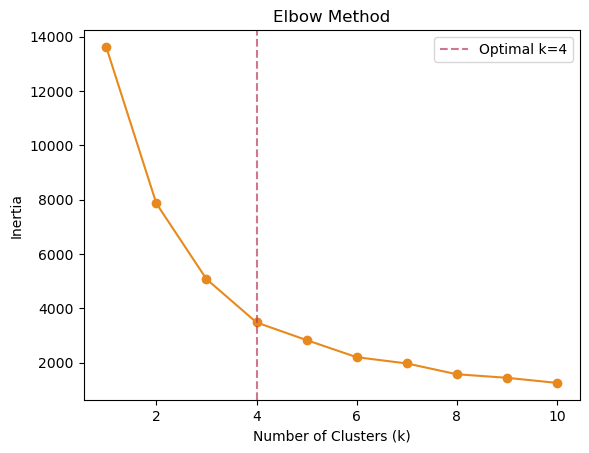

In [92]:
from sklearn.decomposition import PCA

elbow_points = {}
pca = PCA(n_components=2, random_state=42)
pca_reduced_data = pca.fit_transform(data)
print(f"Elbow for PCA")
optimal_k = find_elbow(pca_reduced_data, max_k=10)

<h3 style="color: #b35a;">-- Estimating the best n_components for PCA --</h3>

In [94]:
optimal_k

4

In [95]:
n_components_list = [2, 3, 4]

In [96]:
from sklearn.metrics import silhouette_score

results = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components, random_state=42)
    pca_data = pca.fit_transform(data)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    
    # Evaluate clustering performance using Silhouette Score
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    
    # Store the results
    results.append({
        'n_components': n_components,
        'explained_variance_ratio': pca.explained_variance_ratio_.sum(),
        'silhouette_score': silhouette_avg
    })

results_df = pd.DataFrame(results).sort_values(by="silhouette_score", ascending=False)

In [97]:
results_df

n_components  explained_variance_ratio  silhouette_score
1             3                  0.170690          0.480610
0             2                  0.129425          0.457911
2             4                  0.205596          0.394283

<h3 style="color: #b35a;">-- Dimensionality Reduction with PCA: n_components = 3 --</h3>

In [99]:
n_components=3

In [100]:
pca = PCA(n_components=n_components, random_state=42)
pca_components = pca.fit_transform(data)

In [101]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

<h3 style="color: #b35a;">-- K-means Clustering --</h3>

In [114]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_components)

In [115]:
df['Cluster'] = cluster_labels

In [116]:
pca_df['Cluster'] = cluster_labels

In [117]:
pca_df

PC1       PC2       PC3  Cluster
0      0.182980  0.536141 -0.399347        3
1     -0.565802  0.252625  0.095499        0
2     -0.175998  0.125858 -0.195189        1
3     -0.105240 -0.260392 -0.435341        1
4     -0.318491  0.029448 -0.541567        1
...         ...       ...       ...      ...
19499 -0.185340 -0.549006 -0.445604        1
19500 -0.206995  0.270262  0.177542        0
19501  0.550292  0.012332 -0.154065        1
19502  0.361856 -0.280605 -0.136807        1
19503  0.552035 -0.059658 -0.171457        1

[19504 rows x 4 columns]

<h3 style="color: #b35a;">-- Evaluating Clustering Model and Visualizing the Clusters --</h3>

In [119]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_components, cluster_labels)

In [253]:
inertia = kmeans.inertia_

In [255]:
round(inertia,4)

69855.8711

In [120]:
round(silhouette_avg,4)

0.4806

In [121]:
print(df['Cluster'].value_counts())

Cluster
1    8461
0    5957
2    2557
3    2529
Name: count, dtype: int64


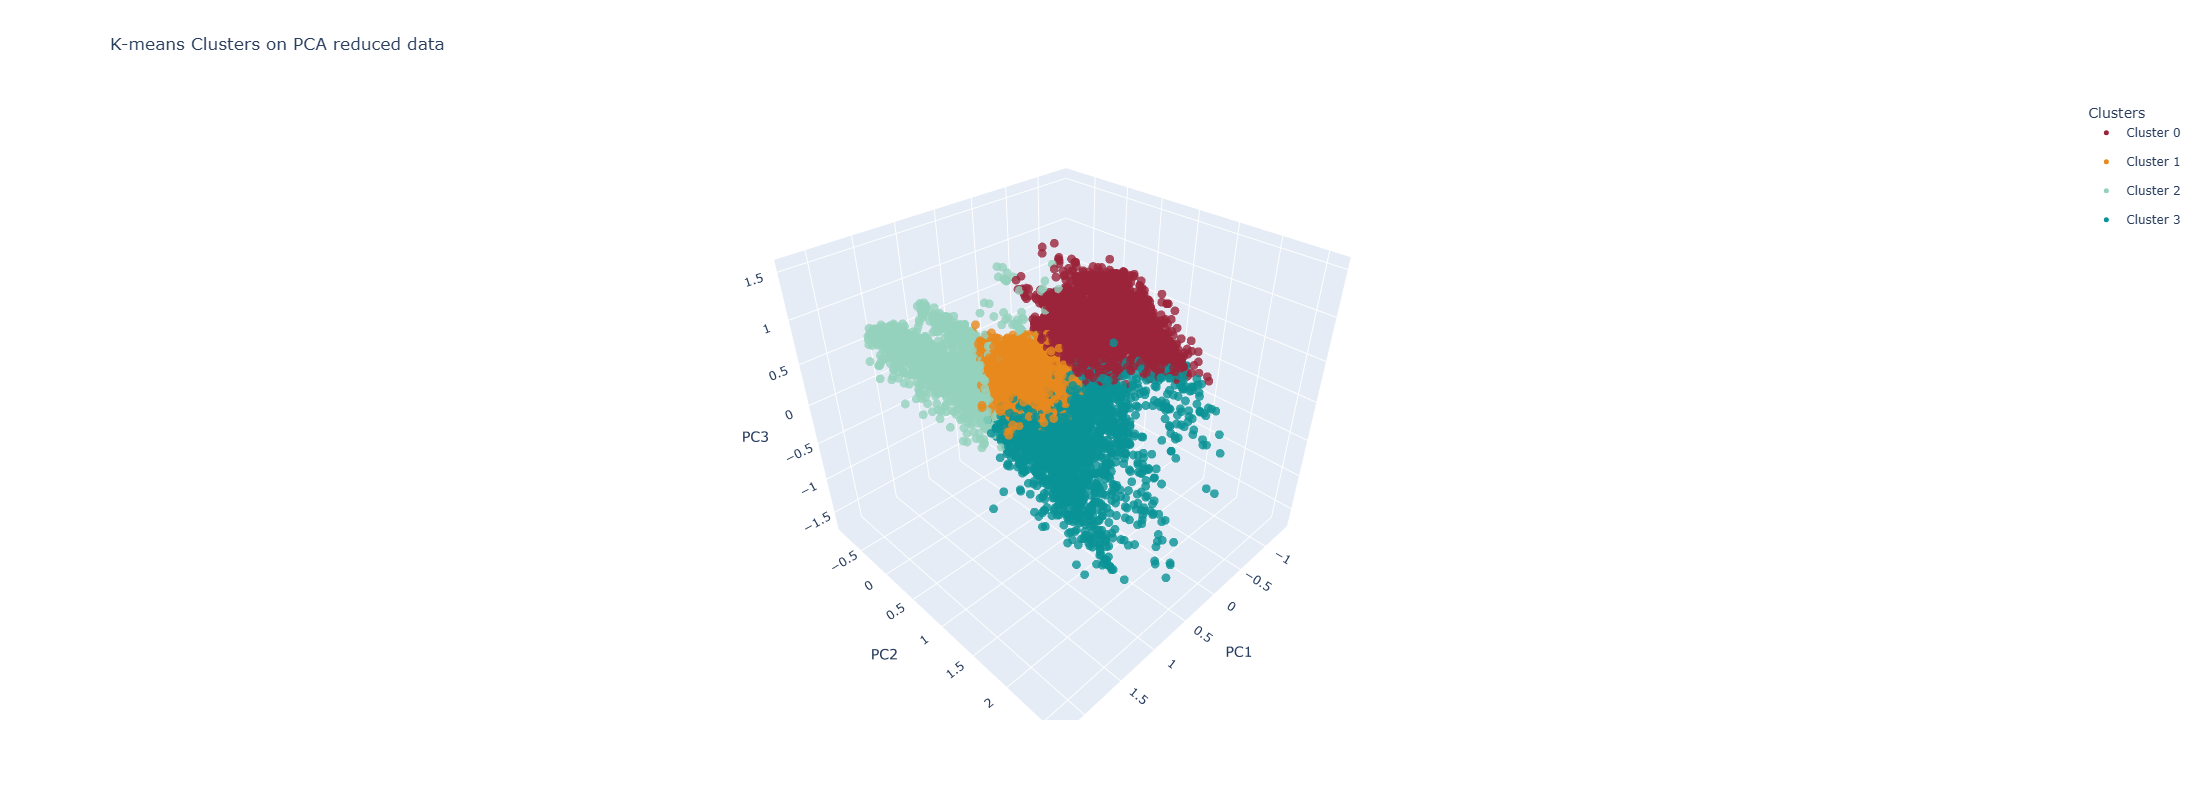

In [198]:
import plotly.express as px
import plotly.graph_objects as go

cluster_colors = {0: '#9B243A',1: '#e8891d', 2: '#94D2BD', 3: '#0A9396'}
pca_df['Color'] = pca_df['Cluster'].map(cluster_colors)

fig = go.Figure(data=[go.Scatter3d(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    z=pca_df['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=pca_df['Color'],
        opacity=0.8
    ),
    text=pca_df['Cluster'],
    showlegend=False
)])

for cluster, color in cluster_colors.items():
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(
            size=5,
            color=color
        ),
        legendgroup=f'Cluster {cluster}',
        name=f'Cluster {cluster}',
        showlegend=True
    ))

fig.update_layout(
    title='K-means Clusters on PCA reduced data',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title='Clusters',
    width=1200,
    height=800 
)

fig.show()
fig.write_html('interactive_plot.html')

<h3 style="color: #b35a;">-- Identifying top features for each PCA component --</h3>

In [124]:
loading_scores = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=data.columns)
print("PCA Component Loadings:\n", loading_scores)

PCA Component Loadings:
                                  PC1       PC2       PC3
gameweight                  0.165391  0.164748 -0.025060
minplayers                 -0.039888 -0.042680  0.018224
maxplayers                 -0.033186 -0.008843 -0.020800
mfgplaytime                 0.070940  0.037267  0.006895
mfgagerec                   0.037214  0.073400  0.015357
...                              ...       ...       ...
theme_photography          -0.000035 -0.000074 -0.000015
theme_cruise_ships         -0.000091  0.000065  0.000022
theme_apache_tribes         0.000042 -0.000007  0.000177
theme_rivers               -0.000026 -0.000146 -0.000201
theme_flags_identification -0.000163 -0.000093  0.000186

[396 rows x 3 columns]


Top 10 features contributing to PC1:
['dice_rolling', 'card_game', 'cat:war', 'hexagon_grid', 'hand_management', 'simulation', 'gameweight', 'set_collection', 'world_war_ii', 'grid_movement'] 

Top 10 features contributing to PC2:
['variable_player_powers', 'hand_management', 'fantasy', 'dice_rolling', 'fighting', 'card_game', 'cat:thematic', 'gameweight', 'adventure', 'modular_board'] 

Top 10 features contributing to PC3:
['card_game', 'cat:war', 'hexagon_grid', 'hand_management', 'simulation', 'cat:strategy', 'tile_placement', 'variable_player_powers', 'modular_board', 'world_war_ii'] 



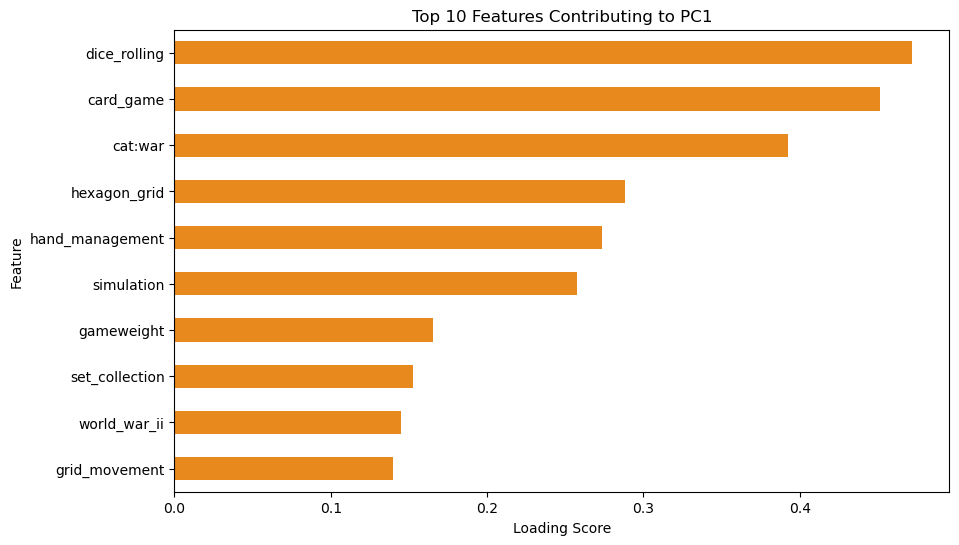

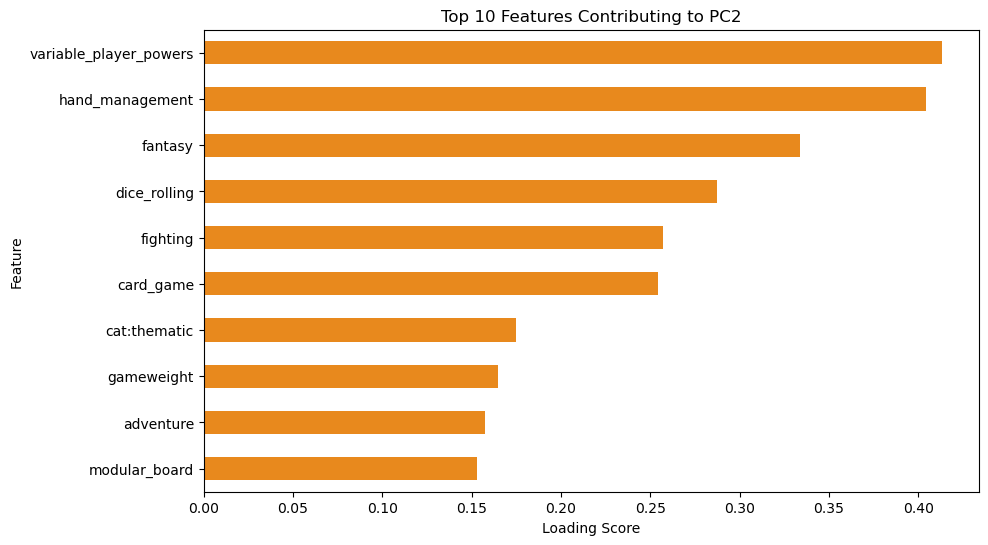

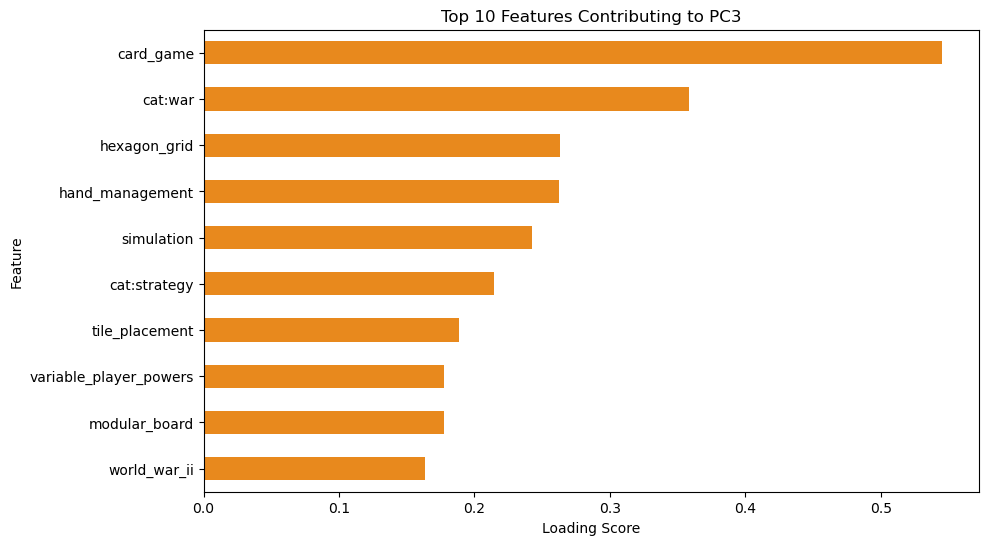

In [125]:
n_top_features = 10
top_features = {}

for pc in loading_scores.columns:
    top_features[pc] = loading_scores[pc].abs().sort_values(ascending=False).head(n_top_features)

for pc, features in top_features.items():
    print(f"Top {n_top_features} features contributing to {pc}:")
    print(features.index.tolist(), "\n")

for pc, features in top_features.items():
    plt.figure(figsize=(10, 6))
    features.sort_values().plot(kind='barh', color = "#e8891d")
    plt.title(f"Top {n_top_features} Features Contributing to {pc}")
    plt.xlabel("Loading Score")
    plt.ylabel("Feature")
    plt.show()

<h3 style="color: #b35a;">-- Defining a recommend_game function: --</h3>

In [140]:
bggid_to_name = merged_df.set_index('bggid')['name'].to_dict()

In [141]:
df['name'] = df['bggid'].map(bggid_to_name)

In [279]:
def recommend_games(selected_game, df):
    # Find the cluster of the selected game
    cluster = df.loc[df['name'] == selected_game, 'Cluster'].values[0]
    
    # Retrieve other games in the same cluster
    recommendations = df[df['Cluster'] == cluster].copy()
    recommendations = recommendations[recommendations['name'] != selected_game]
    
    return recommendations[['name', 'avgrating', 'gameweight']].sort_values(by="avgrating", ascending=False)

In [281]:
df.shape

(19504, 403)

In [283]:
# Example: Recommend games similar to 'Catan'
recommendations = recommend_games('Catan', df)
print(recommendations)

                                              name  avgrating  gameweight
21924                                Captains' War    9.91429      2.5000
19321                                  Composition    9.10865      1.0000
21306                                      Urgency    9.09756      2.0000
21180                          Tomorrow Dies Today    9.05682      4.0000
20017  Star Trek: Alliance – Dominion War Campaign    8.94521      3.0833
...                                            ...        ...         ...
1788                               Global Survival    1.96901      2.1667
7717              Intelligent Design vs. Evolution    1.68793      1.5000
6548                      Rock Paper Scissors Game    1.30968      1.0000
20022                        Alien: USCSS Nostromo    1.16208      1.3333
12542                  Oneupmanship: Mine's Bigger    1.04133      1.0000

[8460 rows x 3 columns]


In [285]:
recommendations.head()

name  avgrating  gameweight
21924                                Captains' War    9.91429      2.5000
19321                                  Composition    9.10865      1.0000
21306                                      Urgency    9.09756      2.0000
21180                          Tomorrow Dies Today    9.05682      4.0000
20017  Star Trek: Alliance – Dominion War Campaign    8.94521      3.0833

In [146]:
df.to_csv("C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Project\\boardgamesdf.csv", index=False)

<h1 style="color: #e8891d;">Improving the Model</h1>

<h3 style="color: #b35a;">-- Examining the cumulative explained variance for PCA --</h3>

In [204]:
pca = PCA(random_state=42)
pca.fit(data)

PCA(random_state=42)

In [206]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

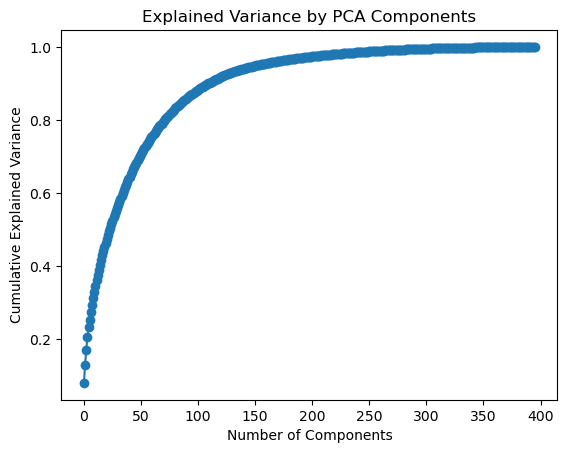

In [212]:
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

<h3 style="color: #b35a;">-- Defining a function to evaluate different clustering models --</h3>

In [174]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import hdbscan

# Define dimensionality reduction methods
dr_methods = {
    'PCA': PCA(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42),
}

# Define clustering methods
clustering_methods = {
    'KMeans': KMeans(random_state=42),
    'Agglomerative': AgglomerativeClustering(),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'HDBSCAN': hdbscan.HDBSCAN(min_samples=5)
}

In [176]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(data, dr_methods, clustering_methods, elbow_points=None, linkage_methods=None):
    results = []

    for dr_name, dr_method in dr_methods.items():
        reduced_data = dr_method.fit_transform(data)
        optimal_k = elbow_points.get(dr_name, 2) if elbow_points else 2

        for cl_name, cl_method in clustering_methods.items():
            if cl_name in ['DBSCAN', 'HDBSCAN']:
                # Skip k-based clustering
                clusters = cl_method.fit_predict(reduced_data)
                num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
                noise_percentage = np.sum(clusters == -1) / len(clusters) * 100

                silhouette = silhouette_score(reduced_data[clusters != -1], clusters[clusters != -1]) \
                    if len(set(clusters)) > 1 else None

                results.append({
                    'Dim_Reduction': dr_name,
                    'Clustering': cl_name,
                    'n_clusters': num_clusters,
                    'Silhouette': silhouette,
                    'Davies-Bouldin': davies_bouldin_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                    'Calinski-Harabasz': calinski_harabasz_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                    'Noise_Percentage': noise_percentage
                })
            elif cl_name == 'Agglomerative':
                for linkage in linkage_methods or ['ward']:
                    cl_method.set_params(linkage=linkage, n_clusters=optimal_k)
                    clusters = cl_method.fit_predict(reduced_data)

                    results.append({
                        'Dim_Reduction': dr_name,
                        'Clustering': f'{cl_name}-{linkage}',
                        'n_clusters': optimal_k,
                        'Silhouette': silhouette_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                        'Davies-Bouldin': davies_bouldin_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                        'Calinski-Harabasz': calinski_harabasz_score(reduced_data, clusters) if len(set(clusters)) > 1 else None
                    })
            else:
                cl_method.set_params(n_clusters=optimal_k)
                clusters = cl_method.fit_predict(reduced_data)

                results.append({
                    'Dim_Reduction': dr_name,
                    'Clustering': cl_name,
                    'n_clusters': optimal_k,
                    'Silhouette': silhouette_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                    'Davies-Bouldin': davies_bouldin_score(reduced_data, clusters) if len(set(clusters)) > 1 else None,
                    'Calinski-Harabasz': calinski_harabasz_score(reduced_data, clusters) if len(set(clusters)) > 1 else None
                })

    return pd.DataFrame(results)

<h3 style="color: #b35a;">-- Comparing the results for different Clustering and Dimensionality Reduction methods --</h3>

In [179]:
print("Clustering methods being tested:", clustering_methods.keys())

Clustering methods being tested: dict_keys(['KMeans', 'Agglomerative', 'DBSCAN', 'HDBSCAN'])


In [186]:
results_df = evaluate_clustering(data, dr_methods, clustering_methods, elbow_points=elbow_points)

In [187]:
results_df.sort_values(by='Silhouette', ascending=False)

Dim_Reduction          Clustering  n_clusters  Silhouette  Davies-Bouldin  \
6         t-SNE              DBSCAN         739    0.848097        1.211898   
7         t-SNE             HDBSCAN         983    0.585958        1.305727   
3           PCA             HDBSCAN         713    0.476054        1.596837   
0           PCA              KMeans           2    0.437688        1.006053   
1           PCA  Agglomerative-ward           2    0.433841        1.008970   
4         t-SNE              KMeans           2    0.350582        1.165884   
5         t-SNE  Agglomerative-ward           2    0.304034        1.245664   
2           PCA              DBSCAN           1         NaN             NaN   

   Calinski-Harabasz  Noise_Percentage  
6          15.356969         68.514151  
7          49.946096         31.701189  
3          24.414392         49.810295  
0       14283.194911               NaN  
1       11457.321769               NaN  
4       11934.571016               NaN  
5        8660.381795               NaN  
2                NaN          0.000000